### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Кейс "чаевые"
### Загрузка данных и их первичная проверка

In [2]:
# Загрузим данные
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
# Статистика по численным столбцам
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Посчитаем число строк
len(tips)

244

In [13]:
# Проверим на наличие NaN в столбцах
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Простая визуализация

C:\Users\Sk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


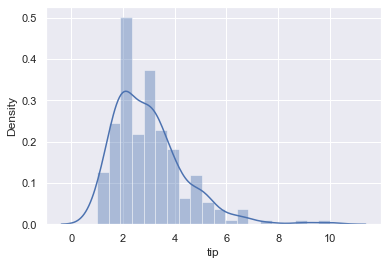

In [18]:
# посмотрим на данные
# bins= 5, 10, 20,30
# почему такая разича в картинках, почему пила, какова причина?
sns.set(); #
sns.distplot(tips['tip'], kde=True, bins=20);

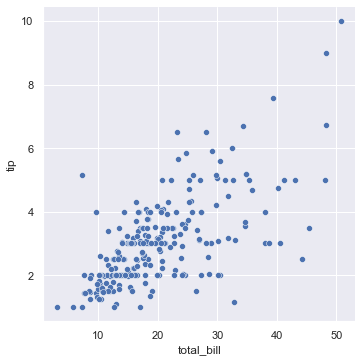

In [19]:
sns.relplot(x="total_bill", y="tip", data=tips);

## Кто больше? Курящие или некурящие?

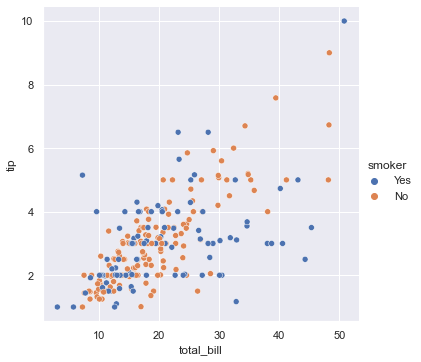

In [20]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

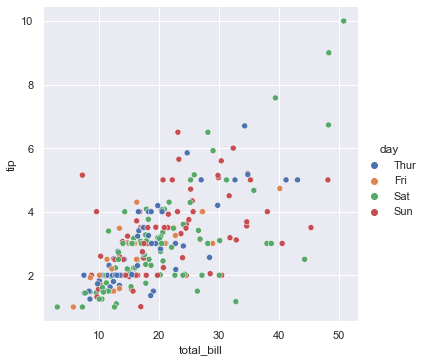

In [21]:
sns.relplot(x='total_bill', y='tip', hue = 'day', data = tips)

In [31]:
smoker_yes['total_bill']

56     38.01
58     11.24
60     20.29
61     13.81
62     11.02
       ...  
234    15.53
236    12.60
237    32.83
240    27.18
241    22.67
Name: total_bill, Length: 93, dtype: float64

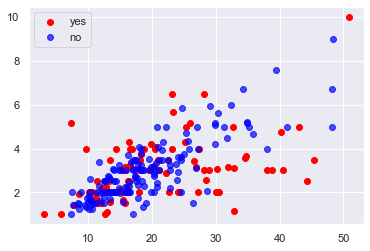

In [38]:
# создать smoker_yes для курящих
smoker_yes = tips[tips['smoker']=='Yes']
# создать smoker_no для некурящих
smoker_no = tips[tips['smoker']=='No']

# создать похожее в matplotlib
plt.scatter(smoker_yes['total_bill'],smoker_yes['tip'], color = 'red',label = 'yes')
plt.scatter(smoker_no['total_bill'],smoker_no['tip'], color = 'blue', label = 'no', alpha = 0.7)
plt.legend()

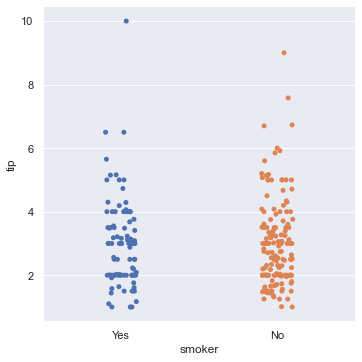

In [39]:
# а так уже проще только в sns
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips);

## Заглянем глубже
### Посмотрим проценты чаевых от счета

In [42]:
# создадим столбец tip_pct впишем код и посмотрим на 5 первых строк
# ваш код
tips['tip_pct'] = tips['tip']/tips['total_bill']*100
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


### Золотое время и в каком зале лучше?

In [82]:
# агрегируем по дням недели и курящим среднею доходность чаевых
tips.groupby(['smoker','day']).mean()

total_bill       tip      size    tip_pct
smoker day                                            
Yes    Thur   19.190588  3.030000  2.352941  16.386327
       Fri    16.813333  2.714000  2.066667  17.478305
       Sat    21.276667  2.875476  2.476190  14.790607
       Sun    24.120000  3.516842  2.578947  18.725032
No     Thur   17.113111  2.673778  2.488889  16.029808
       Fri    18.420000  2.812500  2.250000  15.165044
       Sat    19.661778  3.102889  2.555556  15.804766
       Sun    20.506667  3.167895  2.929825  16.011294

In [83]:
# агрегируем по дням недели и курящим средний процент чаевых с разбросом
tips.groupby(['day','smoker'])['tip_pct'].agg([np.mean,np.std])

mean        std
day  smoker                      
Thur Yes     16.386327   3.938881
     No      16.029808   3.877420
Fri  Yes     17.478305   5.129267
     No      15.165044   2.812295
Sat  Yes     14.790607   6.137495
     No      15.804766   3.976730
Sun  Yes     18.725032  15.413424
     No      16.011294   4.234723

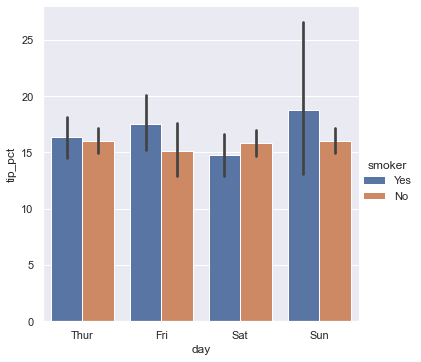

In [79]:
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar");

In [84]:
# стоп, а если разброс нужен не относительно mean а median?
tips.groupby(['smoker','day']).agg([np.median,np.std])['tip_pct']

median        std
smoker day                       
Yes    Thur  15.384615   3.938881
       Fri   17.391304   5.129267
       Sat   15.362439   6.137495
       Sun   13.812155  15.413424
No     Thur  15.349194   3.877420
       Fri   14.924093   2.812295
       Sat   15.015198   3.976730
       Sun   16.166505   4.234723

In [88]:
# агрегируем по значениям и отберем значение счета + проценты 
tips.groupby(['smoker','day']).agg(['count',max,np.mean])['tip_pct']

count        max       mean
smoker day                              
Yes    Thur     17  24.125452  16.386327
       Fri      15  26.348039  17.478305
       Sat      42  32.573290  14.790607
       Sun      19  71.034483  18.725032
No     Thur     45  26.631158  16.029808
       Fri       4  18.773467  15.165044
       Sat      45  29.198966  15.804766
       Sun      57  25.267250  16.011294

In [117]:
# Сколько было обслужено, и какие чаевые были максимальны?
tips.groupby(['smoker','day']).agg({'size': 'count', 'tip': np.max})

size    tip
smoker day              
Yes    Thur    17   5.00
       Fri     15   4.73
       Sat     42  10.00
       Sun     19   6.50
No     Thur    45   6.70
       Fri      4   3.50
       Sat     45   9.00
       Sun     57   6.00

In [116]:
# статистика по прочентам чаевых (min,max,mean,std) и количество обслуженных
print('статистика:')
print(tips.agg({'tip_pct':[np.min, np.max,np.mean, np.std]}))
print('количество обслуженных')
tips['size'].sum()

статистика:
        tip_pct
amin   3.563814
amax  71.034483
mean  16.080258
std    6.107220
количество обслуженных


627

### Рыба моей мечты (лучший клиент)

In [118]:
# проиндексируем средние по дням и курильшикам данные
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Thur,Yes,19.190588,3.030000,2.352941,16.386327
1,Thur,No,17.113111,2.673778,2.488889,16.029808
2,Fri,Yes,16.813333,2.714000,2.066667,17.478305
3,Fri,No,18.420000,2.812500,2.250000,15.165044
4,Sat,Yes,21.276667,2.875476,2.476190,14.790607
5,Sat,No,19.661778,3.102889,2.555556,15.804766
6,Sun,Yes,24.120000,3.516842,2.578947,18.725032
7,Sun,No,20.506667,3.167895,2.929825,16.011294


In [129]:
# найдем три наилучших счета среди каждой группы курящих
tips.groupby('smoker').total_bill.nlargest(3)

smoker     
Yes     170    50.81
        182    45.35
        102    44.30
No      212    48.33
        59     48.27
        156    48.17
Name: total_bill, dtype: float64

In [130]:
# найдем три наилучших
tips.nlargest(3, 'total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407


In [132]:
# улучшим вывод через lambda
tips.groupby('smoker').apply(lambda x: x.nlargest(3, 'total_bill'))

total_bill    tip     sex smoker  day    time  size    tip_pct
smoker                                                                    
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  19.681165
       182       45.35   3.50    Male    Yes  Sun  Dinner     3   7.717751
       102       44.30   2.50  Female    Yes  Sat  Dinner     3   5.643341
No     212       48.33   9.00    Male     No  Sat  Dinner     4  18.621974
       59        48.27   6.73    Male     No  Sat  Dinner     4  13.942407
       156       48.17   5.00    Male     No  Sun  Dinner     6  10.379905

In [135]:
# еще круче - через собственную функцию
def large (df ,n, column):
    return df.nlargest(n, column)

tips.groupby('smoker').apply(large, 3, 'total_bill')

total_bill    tip     sex smoker  day    time  size    tip_pct
smoker                                                                    
Yes    170       50.81  10.00    Male    Yes  Sat  Dinner     3  19.681165
       182       45.35   3.50    Male    Yes  Sun  Dinner     3   7.717751
       102       44.30   2.50  Female    Yes  Sat  Dinner     3   5.643341
No     212       48.33   9.00    Male     No  Sat  Dinner     4  18.621974
       59        48.27   6.73    Male     No  Sat  Dinner     4  13.942407
       156       48.17   5.00    Male     No  Sun  Dinner     6  10.379905

In [ ]:
# еще и еще круче - через собственную функцию с начтройками
# ваш код

In [ ]:
# Найдем клиента дня по размеру чаевых
# ваш код

In [140]:
# Найдем клиента дня по проценту от счета
tips.groupby(['smoker','day']).apply(large, n = 1, column = 'tip_pct' ) 

total_bill   tip     sex smoker   day    time  size  \
smoker day                                                             
Yes    Thur 194       16.58  4.00    Male    Yes  Thur   Lunch     2   
       Fri  93        16.32  4.30  Female    Yes   Fri  Dinner     2   
       Sat  67         3.07  1.00  Female    Yes   Sat  Dinner     1   
       Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2   
No     Thur 149        7.51  2.00    Male     No  Thur   Lunch     2   
       Fri  223       15.98  3.00  Female     No   Fri   Lunch     3   
       Sat  232       11.61  3.39    Male     No   Sat  Dinner     2   
       Sun  51        10.29  2.60  Female     No   Sun  Dinner     2   

                   tip_pct  
smoker day                  
Yes    Thur 194  24.125452  
       Fri  93   26.348039  
       Sat  67   32.573290  
       Sun  172  71.034483  
No     Thur 149  26.631158  
       Fri  223  18.773467  
       Sat  232  29.198966  
       Sun  51   25.267250

## Создадим СВОДНУЮ ТАБЛИЦУ (а как вы думаете в чем отличие?)

In [149]:
tips.pivot_table(index=['smoker','day'])

size       tip    tip_pct  total_bill
smoker day                                            
Yes    Thur  2.352941  3.030000  16.386327   19.190588
       Fri   2.066667  2.714000  17.478305   16.813333
       Sat   2.476190  2.875476  14.790607   21.276667
       Sun   2.578947  3.516842  18.725032   24.120000
No     Thur  2.488889  2.673778  16.029808   17.113111
       Fri   2.250000  2.812500  15.165044   18.420000
       Sat   2.555556  3.102889  15.804766   19.661778
       Sun   2.929825  3.167895  16.011294   20.506667

In [151]:
tips.pivot_table( ['tip_pct','size'], index=['time','day'],   columns = 'smoker' )

size              tip_pct           
smoker            Yes        No        Yes         No
time   day                                           
Lunch  Thur  2.352941  2.500000  16.386327  16.031067
       Fri   1.833333  3.000000  18.893659  18.773467
Dinner Thur       NaN  2.000000        NaN  15.974441
       Fri   2.222222  2.000000  16.534736  13.962237
       Sat   2.476190  2.555556  14.790607  15.804766
       Sun   2.578947  2.929825  18.725032  16.011294

In [157]:
tips.pivot_table('tip_pct',   index=['time','smoker'],   columns = 'day' , aggfunc = len ,margins = True )

day            Thur   Fri   Sat   Sun    All
time   smoker                               
Lunch  Yes     17.0   6.0   NaN   NaN   23.0
       No      44.0   1.0   NaN   NaN   45.0
Dinner Yes      NaN   9.0  42.0  19.0   70.0
       No       1.0   3.0  45.0  57.0  106.0
All            62.0  19.0  87.0  76.0  244.0

## Кростабуляция (считаем количество)
Почему через кростабуляцию считать лучше?

In [147]:
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True)

day            Thur  Fri  Sat  Sun  All
time   smoker                          
Lunch  Yes       17    6    0    0   23
       No        44    1    0    0   45
Dinner Yes        0    9   42   19   70
       No         1    3   45   57  106
All              62   19   87   76  244

In [161]:
# Хитрый вопрос, а как убрать All снизу, а справа?
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True).iloc[:-1, :-1]

day            Thur  Fri  Sat  Sun
time   smoker                     
Lunch  Yes       17    6    0    0
       No        44    1    0    0
Dinner Yes        0    9   42   19
       No         1    3   45   57

## Немного Seaborn'a


C:\Users\Sk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

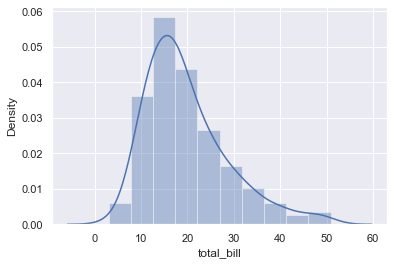

In [169]:
# График функции распределения 
sns.distplot(tips['total_bill'], kde = True, bins = 10 )

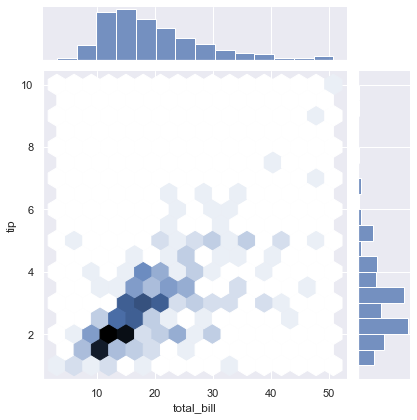

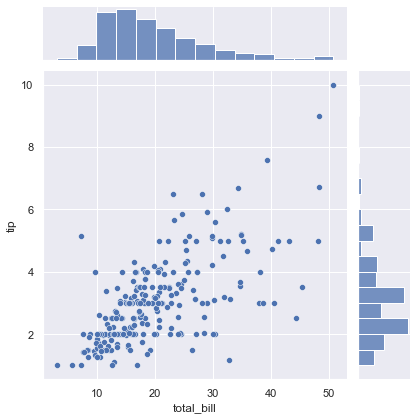

In [174]:
# jointplot( “scatter” “reg” “resid” “kde” “hex”)

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')

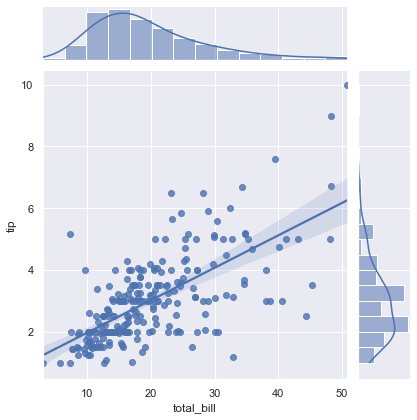

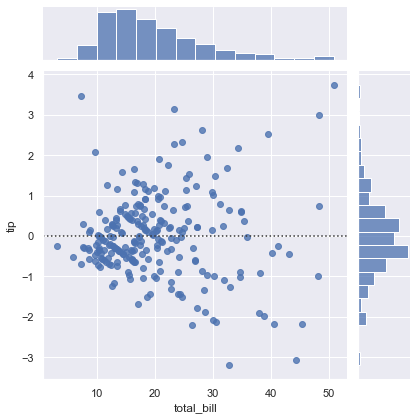

In [178]:
sns.jointplot( x = 'total_bill', y = 'tip', data = tips, kind = 'reg')
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'resid')

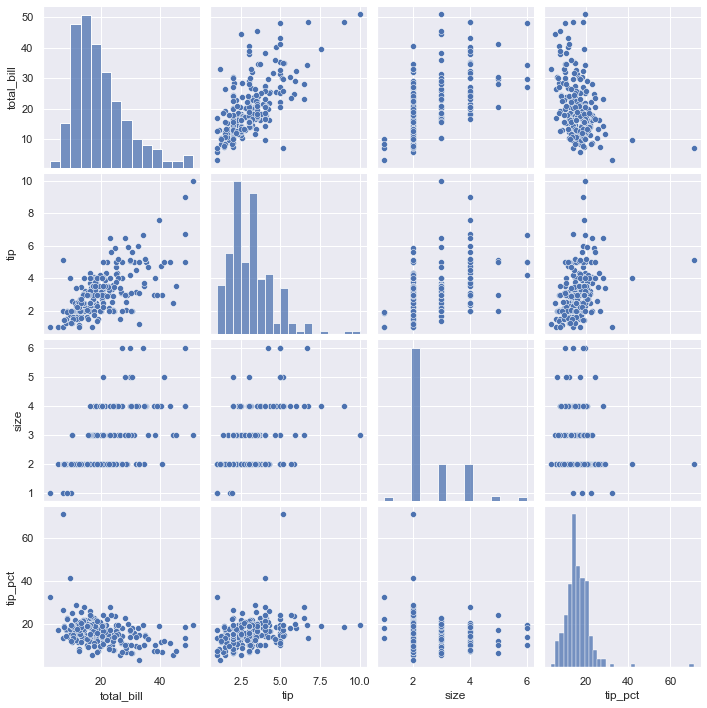

In [179]:
sns.pairplot(tips)

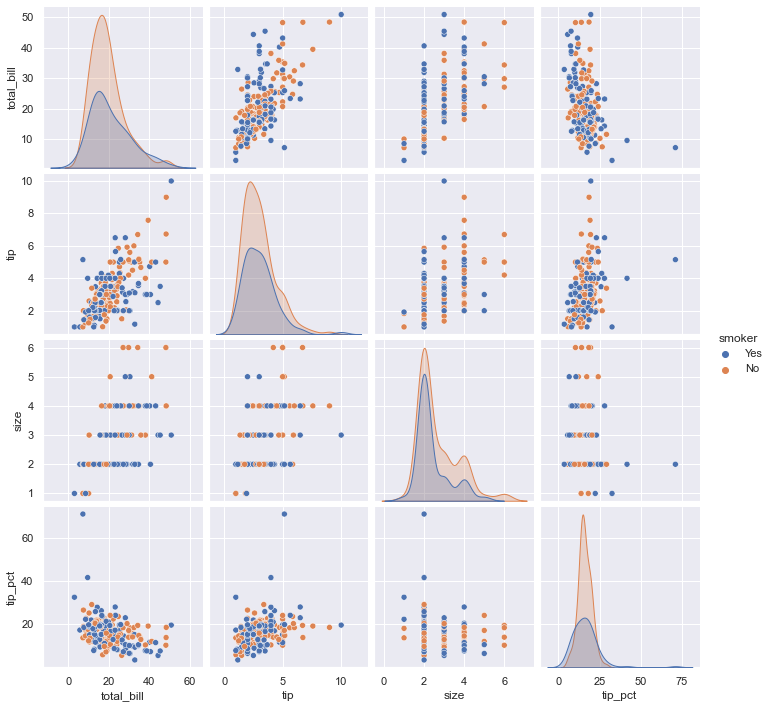

In [180]:
sns.pairplot(tips, hue = 'smoker')

C:\Users\Sk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

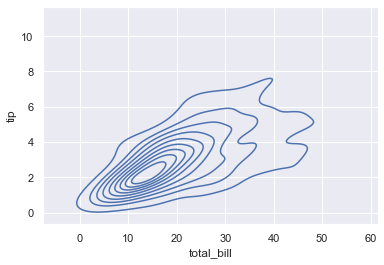

In [181]:
sns.kdeplot(tips['total_bill'], tips['tip'])

<AxesSubplot:>

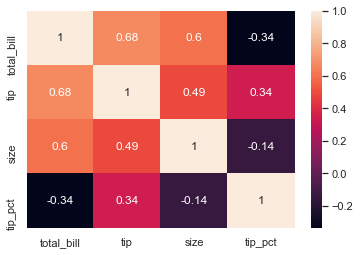

In [183]:
# Тепловая карта
sns.heatmap(tips.corr(),annot=True)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

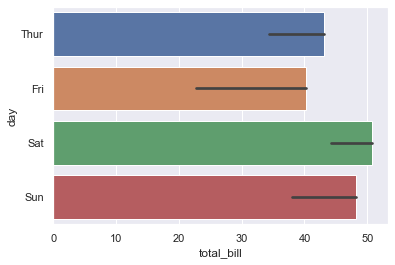

In [191]:
sns.barplot( data = tips, x = 'total_bill', y = 'day', estimator = np.max)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

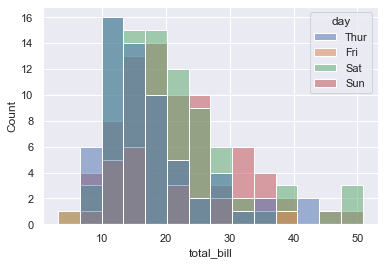

In [190]:
sns.histplot( data = tips, x = 'total_bill', hue = 'day')